In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/sample_submission.csv.zip
/kaggle/input/test.csv
/kaggle/input/sample_submission.csv
/kaggle/input/train.csv.zip
/kaggle/input/description.md
/kaggle/input/train.csv
/kaggle/input/test.csv.zip
/kaggle/input/tabular-playground-series-dec-2021/sample_submission.csv.zip
/kaggle/input/tabular-playground-series-dec-2021/test.csv
/kaggle/input/tabular-playground-series-dec-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-dec-2021/train.csv.zip
/kaggle/input/tabular-playground-series-dec-2021/description.md
/kaggle/input/tabular-playground-series-dec-2021/train.csv
/kaggle/input/tabular-playground-series-dec-2021/test.csv.zip


In [3]:
import numpy as np              # linear algebra
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)
                                
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # data visualization


In [4]:
sample_submission = pd.read_csv("/kaggle/input/tabular-playground-series-dec-2021/sample_submission.csv")
train = pd.read_csv("/kaggle/input/tabular-playground-series-dec-2021/train.csv")
test = pd.read_csv("/kaggle/input/tabular-playground-series-dec-2021/test.csv")


In [5]:
sample_submission.shape


(400000, 2)

In [6]:
train.shape


(3600000, 56)

In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 56 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Id                                  int64
 1   Elevation                           int64
 2   Aspect                              int64
 3   Slope                               int64
 4   Horizontal_Distance_To_Hydrology    int64
 5   Vertical_Distance_To_Hydrology      int64
 6   Horizontal_Distance_To_Roadways     int64
 7   Hillshade_9am                       int64
 8   Hillshade_Noon                      int64
 9   Hillshade_3pm                       int64
 10  Horizontal_Distance_To_Fire_Points  int64
 11  Wilderness_Area1                    int64
 12  Wilderness_Area2                    int64
 13  Wilderness_Area3                    int64
 14  Wilderness_Area4                    int64
 15  Soil_Type1                          int64
 16  Soil_Type2                          

In [8]:
test.shape


(400000, 55)

In [9]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Id                                  400000 non-null  int64
 1   Elevation                           400000 non-null  int64
 2   Aspect                              400000 non-null  int64
 3   Slope                               400000 non-null  int64
 4   Horizontal_Distance_To_Hydrology    400000 non-null  int64
 5   Vertical_Distance_To_Hydrology      400000 non-null  int64
 6   Horizontal_Distance_To_Roadways     400000 non-null  int64
 7   Hillshade_9am                       400000 non-null  int64
 8   Hillshade_Noon                      400000 non-null  int64
 9   Hillshade_3pm                       400000 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  400000 non-null  int64
 11  Wilderness_Area1                    400000 non-null 

In [10]:
data = pd.concat([train, test], sort = False)
data.shape


(4000000, 56)

In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4000000 entries, 0 to 399999
Data columns (total 56 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   Id                                  int64  
 1   Elevation                           int64  
 2   Aspect                              int64  
 3   Slope                               int64  
 4   Horizontal_Distance_To_Hydrology    int64  
 5   Vertical_Distance_To_Hydrology      int64  
 6   Horizontal_Distance_To_Roadways     int64  
 7   Hillshade_9am                       int64  
 8   Hillshade_Noon                      int64  
 9   Hillshade_3pm                       int64  
 10  Horizontal_Distance_To_Fire_Points  int64  
 11  Wilderness_Area1                    int64  
 12  Wilderness_Area2                    int64  
 13  Wilderness_Area3                    int64  
 14  Wilderness_Area4                    int64  
 15  Soil_Type1                          int64  
 16  Soil_T

In [12]:
data.head()


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3440475,2634,132,3,166,38,1247,251,210,119,...,0,0,0,0,0,0,0,0,0,2.0
1,2470812,2769,89,5,633,10,626,177,209,178,...,0,0,0,0,0,0,0,0,0,2.0
2,536780,2749,46,30,127,239,2569,206,216,144,...,0,0,0,0,0,0,0,0,0,2.0
3,3115135,2574,155,20,279,1,1932,205,189,199,...,0,0,0,0,0,0,0,0,0,2.0
4,81861,2779,91,19,523,-2,2976,240,246,105,...,0,0,0,0,0,0,0,0,0,2.0


In [13]:
null_cols = [col for col in data.iloc[: , : -1].columns if data[col].isnull().sum() != 0]
null_cols


[]

In [14]:
TARGET = 'Cover_Type'
FEATURES = [col for col in train.columns if col not in ['id', TARGET]]

cat_features = [col for col in FEATURES if data[col].nunique()  25]
cont_features = [col for col in FEATURES if data[col].nunique() >= 25]

del data
print(f'Total number of features: {len(FEATURES)}')
print(f'Number of categorical features: {len(cat_features)}')
print(f'Number of continuos features: {len(cont_features)}')

plt.pie([len(cat_features), len(cont_features)], 
        labels=['Categorical', 'Continuos'],
        colors=['#76D7C4', '#F5B7B1'],
        textprops={'fontsize': 13},
        autopct='%1.1f%%')
plt.show()


SyntaxError: invalid syntax (1106077025.py, line 4)

In [15]:
train.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')


,count,mean,std,min,25%,50%,75%,max
Id,3600000.000000,2000068.685866,1154819.732920,0.000000,999737.750000,2000171.500000,3000448.500000,3999999.000000
Horizontal_Distance_To_Roadways,3600000.000000,1766.482904,1315.660581,-287.000000,822.000000,1436.000000,2365.000000,7666.000000
Horizontal_Distance_To_Fire_Points,3600000.000000,1581.520201,1127.627133,-277.000000,781.000000,1361.000000,2084.000000,8075.000000
Elevation,3600000.000000,2980.147353,289.044049,1773.000000,2760.000000,2966.000000,3217.000000,4383.000000
Horizontal_Distance_To_Hydrology,3600000.000000,271.276113,226.509966,-82.000000,110.000000,213.000000,361.000000,1602.000000
Aspect,3600000.000000,151.572657,109.949721,-33.000000,60.000000,123.000000,247.000000,405.000000
Vertical_Distance_To_Hydrology,3600000.000000,51.667899,68.225025,-317.000000,4.000000,31.000000,78.000000,632.000000
Hillshade_3pm,3600000.000000,140.813570,43.678945,-53.000000,115.000000,142.000000,169.000000,272.000000
Hillshade_9am,3600000.000000,211.838986,30.754979,-4.000000,198.000000,218.000000,233.000000,297.000000
Hillshade_Noon,3600000.000000,221.057635,22.233728,49.000000,210.000000,224.000000,237.000000,279.000000


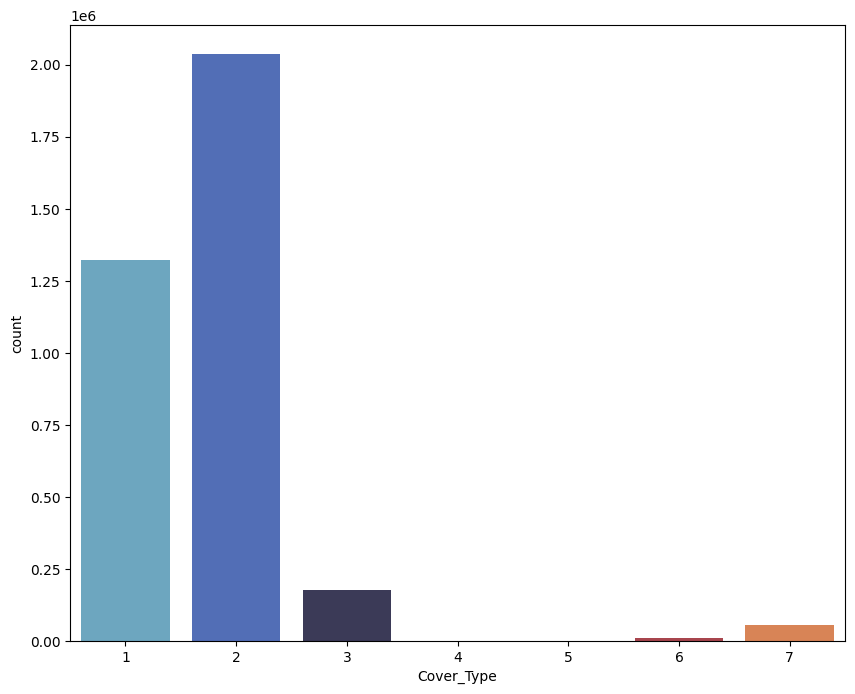

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(x='Cover_Type', data=train, palette='icefire');


In [17]:
# predictor
X = train.drop(columns=['Id','Cover_Type','Soil_Type7','Soil_Type15'])

# target
y = train['Cover_Type']

# test data 
test_df = test.drop(columns=['Id','Soil_Type7','Soil_Type15'])


In [18]:
# train-test split

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=123, shuffle =True)


In [19]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.3,
                      tree_method='gpu_hist',
                      random_state=0)
model.fit(X_train,y_train)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got [1 2 3 4 5 6 7]

In [20]:
# validation prediction
y_pred=model.predict(X_val)


NotFittedError: need to call fit or load_model beforehand

In [21]:
# validation accuracy
from sklearn.metrics import accuracy_score
print('Accuracy Score : ',accuracy_score(y_val, y_pred))


NameError: name 'y_pred' is not defined

In [22]:
# test prediction
y_pred = model.predict(test_df)


NotFittedError: need to call fit or load_model beforehand

In [23]:
# submission
submission = pd.read_csv('../input/tabular-playground-series-dec-2021/sample_submission.csv')
submission['Cover_Type'] = y_pred
submission.to_csv("submission.csv",index=False)
submission.head()


NameError: name 'y_pred' is not defined